In [517]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [518]:
df = pd.read_csv('marketing_campaign_data.csv', index_col = [0])
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
967,7011,1973,S1,Menikah,33471000.0,1,0,12-10-2012,47,43000,2000,27000,0,9000,12000,3,3,0,4,7,0,0,0,0,0,0,3,11,0
375,10703,1975,S2,Lajang,46098000.0,1,1,18-08-2012,86,57000,0,27000,0,0,36000,4,3,2,2,8,0,0,0,0,0,0,3,11,0
81,2261,1969,S1,Menikah,26304000.0,1,0,23-06-2013,5,4000,1000,5000,2000,0,4000,1,1,0,2,7,0,0,0,0,0,0,3,11,0
1155,213,1963,S3,Lajang,23091000.0,1,1,28-05-2014,98,35000,0,11000,0,0,2000,4,2,1,3,7,0,0,0,0,0,0,3,11,0
1099,6001,1979,S1,Menikah,56775000.0,0,1,02-01-2013,62,614000,35000,160000,58000,35000,35000,2,5,8,10,5,0,0,0,0,0,0,3,11,0


In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Feature Engineering

In [520]:
df['Conversion_Rate'] = np.round(df['Response']/df['NumWebVisitsMonth'], 2)

In [521]:
current_year = 2024
df['Age'] = current_year - df['Year_Birth']

In [522]:
df['Children'] = df['Kidhome'] + df['Teenhome'] 

In [523]:
df['Total_Spending'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [524]:
df['Total_Transaction'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

## Data Description

In [525]:
num = df.select_dtypes(exclude='object').columns.tolist()
cat = df.select_dtypes(include='object').columns.tolist()

In [526]:
df[num].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Conversion_Rate,Age,Children,Total_Spending,Total_Transaction
count,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2229.000000,2240.000000,2240.000000,2.240000e+03,2240.000000
mean,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,0.043508,55.194196,0.950446,6.057982e+05,14.862054
std,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.142827,11.984069,0.751803,6.022493e+05,7.677173
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,28.000000,0.000000,5.000000e+03,0.000000
25%,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,47.000000,0.000000,6.875000e+04,8.000000
50%,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,54.000000,1.000000,3.960000e+05,15.000000
75%,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,65.000000,1.000000,1.045500e+06,21.000000
max,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,1.000000,131.000000,3.000000,2.525000e+06,44.000000


In [527]:
df[cat].describe()

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,6,663
top,S1,Menikah,31-08-2012
freq,1127,864,12


## EDA

In [528]:
def age_group(x):
    if x <= 30:
        return '20-30'
    elif x <= 40:
        return '31-40'
    elif x <= 50:
        return '41-50'
    elif x <= 60:
        return '51-60'
    elif x <= 70:
        return '61-70'
    elif x <= 80:
        return '71-80'
    else:
        return '>80'
df['Age_Group'] = df['Age'].apply(lambda x : age_group(x))
CVR_by_age = df.groupby('Age_Group', as_index=False).agg({'ID': 'count', 'Conversion_Rate': 'mean'})
CVR_by_age

,Age_Group,ID,Conversion_Rate
0,20-30,10,0.061000
1,31-40,249,0.070683
2,41-50,588,0.042414
3,51-60,649,0.031747
4,61-70,475,0.041459
5,71-80,257,0.049252
6,>80,12,0.111667


Text(-0.5, 0.12, 'Conversion Rate Based on Age')

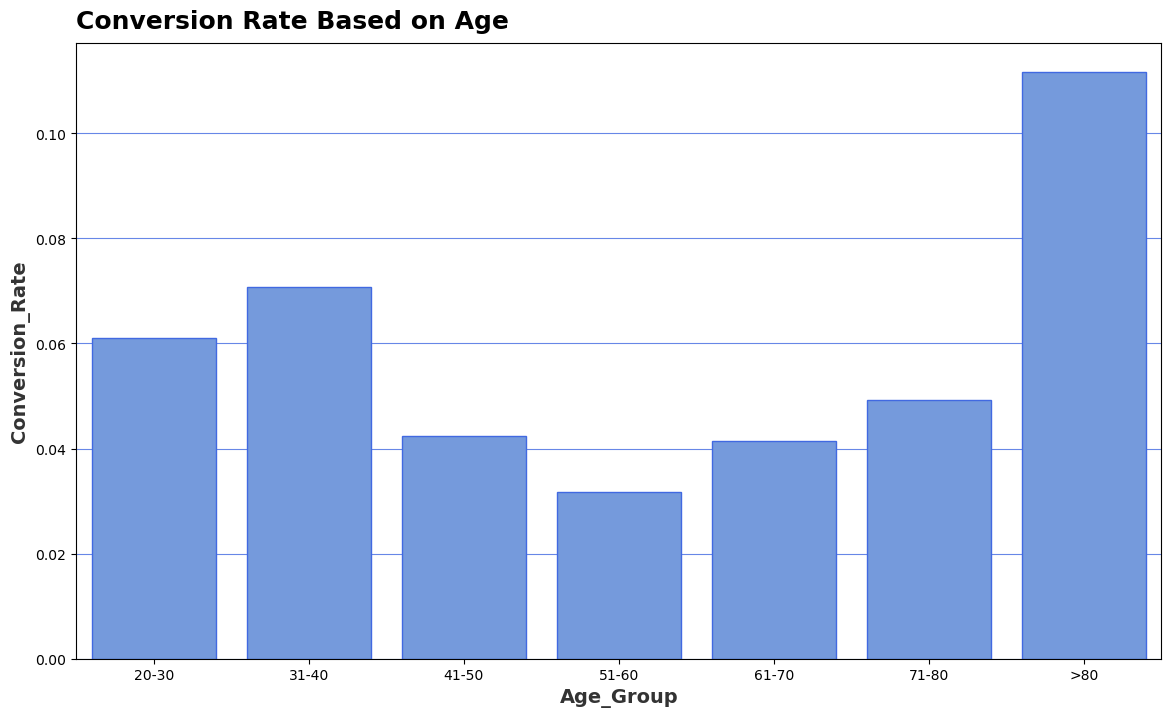

In [529]:
fig, ax = plt.subplots(1, 1, figsize=(14,8))
sns.barplot(data=CVR_by_age, x='Age_Group', y='Conversion_Rate', color='cornflowerblue',
            edgecolor='royalblue', ax=ax)
ax.set_xlabel('Age_Group', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion_Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.grid(axis='y', alpha=0.8, color ='royalblue')
ax.set_axisbelow(True)
plt.text(s="Conversion Rate Based on Age",
         x=-0.5, y=0.12, fontsize=18, fontweight='bold')

In [530]:
income = np.where(df['Income']>100000000, 110000000, df['Income'])
income_bins = list(np.arange(0, max(income)+10000000, 10000000))
income_labs = ['{}M-{}M'.format(i*10, (i+1)*10) for i in range(10)] + ['>100M']
df['Income_Group'] = pd.cut(income, bins=income_bins, labels=income_labs)
CVR_income = df.groupby('Income_Group', as_index=False).agg({'ID': 'count', 'Conversion_Rate': 'mean'})
CVR_income

,Income_Group,ID,Conversion_Rate
0,0M-10M,29,0.012143
1,10M-20M,98,0.014184
2,20M-30M,243,0.013786
3,30M-40M,362,0.017265
4,40M-50M,328,0.016738
5,50M-60M,315,0.013397
6,60M-70M,333,0.028619
7,70M-80M,291,0.073517
8,80M-90M,164,0.193416
9,90M-100M,40,0.291538


Text(-0.5, 0.34, ' Conversion Rates Based on Income')

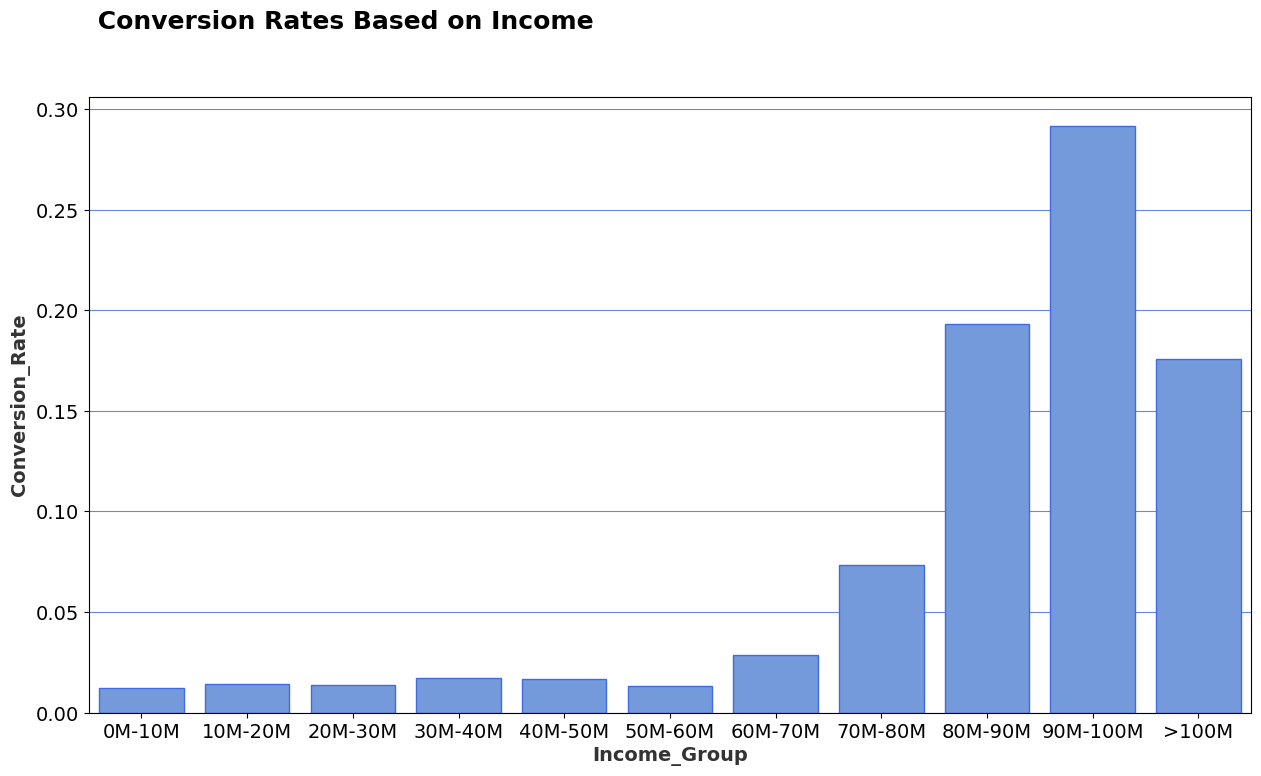

In [531]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.barplot(data=CVR_income, x='Income_Group', y='Conversion_Rate', color='cornflowerblue', edgecolor='royalblue', ax=ax)
ax.set_xlabel('Income_Group', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion_Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8, color='royalblue')
ax.set_axisbelow(True)
plt.text(s=" Conversion Rates Based on Income",
         x=-0.5, y=0.34, fontsize=18, fontweight='bold')

In [532]:
CVR_children = df.groupby('Children', as_index=False).agg({'ID': 'count', 'Conversion_Rate': 'mean'})
CVR_children

,Children,ID,Conversion_Rate
0,0,638,0.115962
1,1,1128,0.015262
2,2,421,0.015619
3,3,53,0.005283


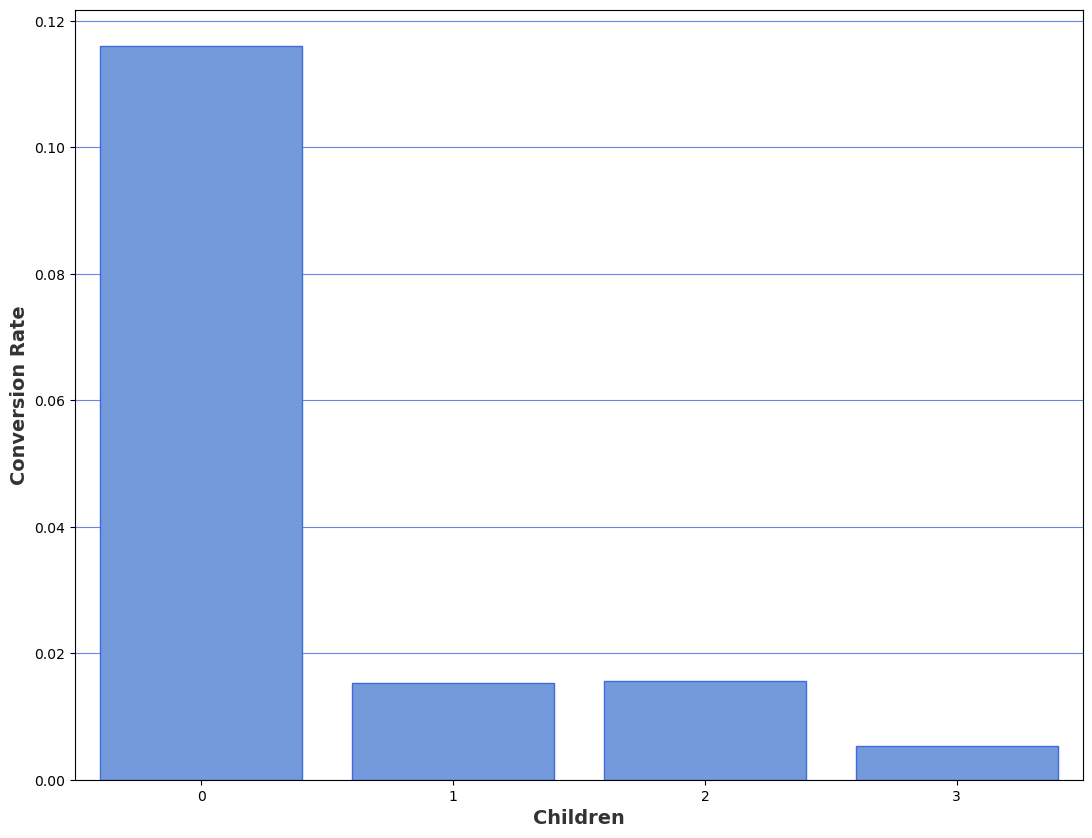

In [533]:
fig, ax = plt.subplots(1, 1, figsize=(13,10))
sns.barplot(data=CVR_children, x='Children', y='Conversion_Rate', color='cornflowerblue', edgecolor='royalblue', ax=ax)
ax.set_xlabel('Children', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.grid(axis='y', alpha=0.8, color='royalblue')
ax.set_axisbelow(True)

In [534]:
def spending_group(x):
    if x <= 500000:
        return '0-0.5M'
    elif x <= 1000000:
        return '0.5M-1M'
    elif x <= 1500000:
        return '1M-1.5M'
    elif x <= 2000000:
        return '1.5M-2M'
    elif x <= 2500000:
        return '2M-2.5M'
    else:
        return '>2.5M'

df['Spending_Group'] = df['Total_Spending'].apply(lambda x : spending_group(x))
CVR_Spending = df.groupby('Spending_Group', as_index=False).agg({'ID': 'count', 'Conversion_Rate': 'mean'})
CVR_Spending = CVR_Spending.sort_values('ID', ascending=False)
CVR_Spending

,Spending_Group,ID,Conversion_Rate
0,0-0.5M,1246,0.013596
1,0.5M-1M,392,0.023376
3,1M-1.5M,356,0.076790
2,1.5M-2M,196,0.169741
4,2M-2.5M,47,0.210638
5,>2.5M,3,0.416667


Text(-0.3, 0.45, 'Conversion Rates Based on Spending')

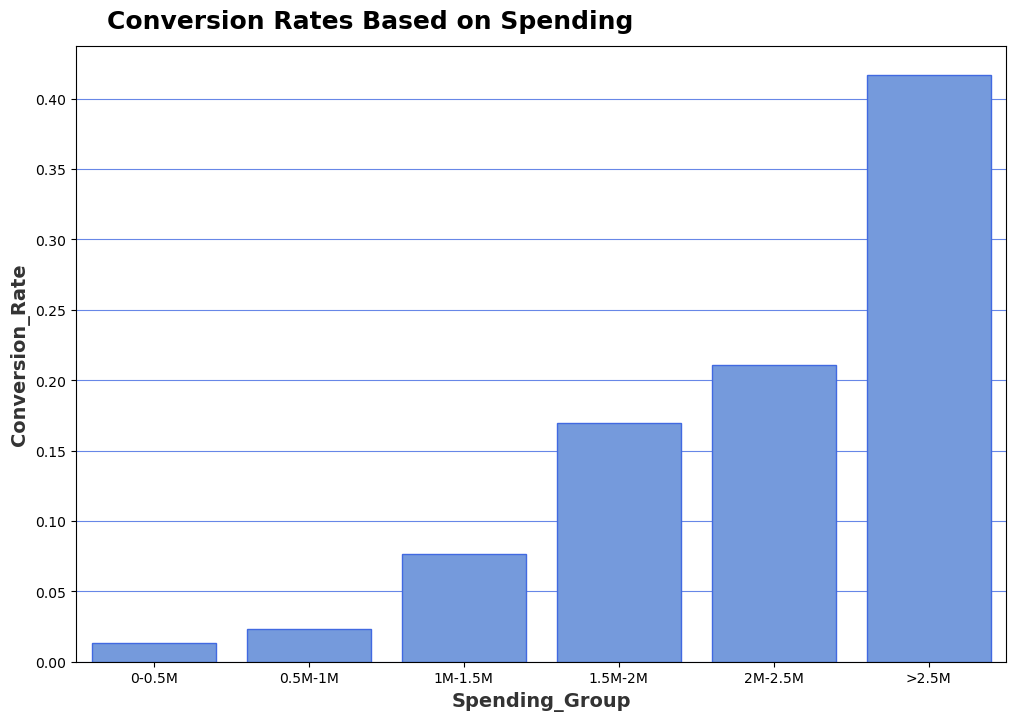

In [535]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
sns.barplot(data=CVR_Spending, x='Spending_Group', y='Conversion_Rate', color='cornflowerblue',
            edgecolor='royalblue', ax=ax)
ax.set_xlabel('Spending_Group', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion_Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.grid(axis='y', alpha=0.8, color='royalblue')
ax.set_axisbelow(True)
plt.text(s="Conversion Rates Based on Spending",
         x=-0.3, y=0.45, fontsize=18, fontweight='bold')

In [536]:
def transaction_group(x):
    if x <= 10:
        return '0-10'
    elif x <= 20:
        return '10-20'
    elif x <= 30:
        return '20-30'
    elif x <= 40:
        return '30-40'
    else:
        return '>40'
df['Transaction_Group'] = df['Total_Transaction'].apply(lambda x : transaction_group(x))
CVR_Transaction = df.groupby('Transaction_Group', as_index=False).agg({'ID': 'count', 'Conversion_Rate': 'mean'})
CVR_Transaction

,Transaction_Group,ID,Conversion_Rate
0,0-10,832,0.010869
1,10-20,801,0.060501
2,20-30,571,0.068169
3,30-40,34,0.029394
4,>40,2,0.000000


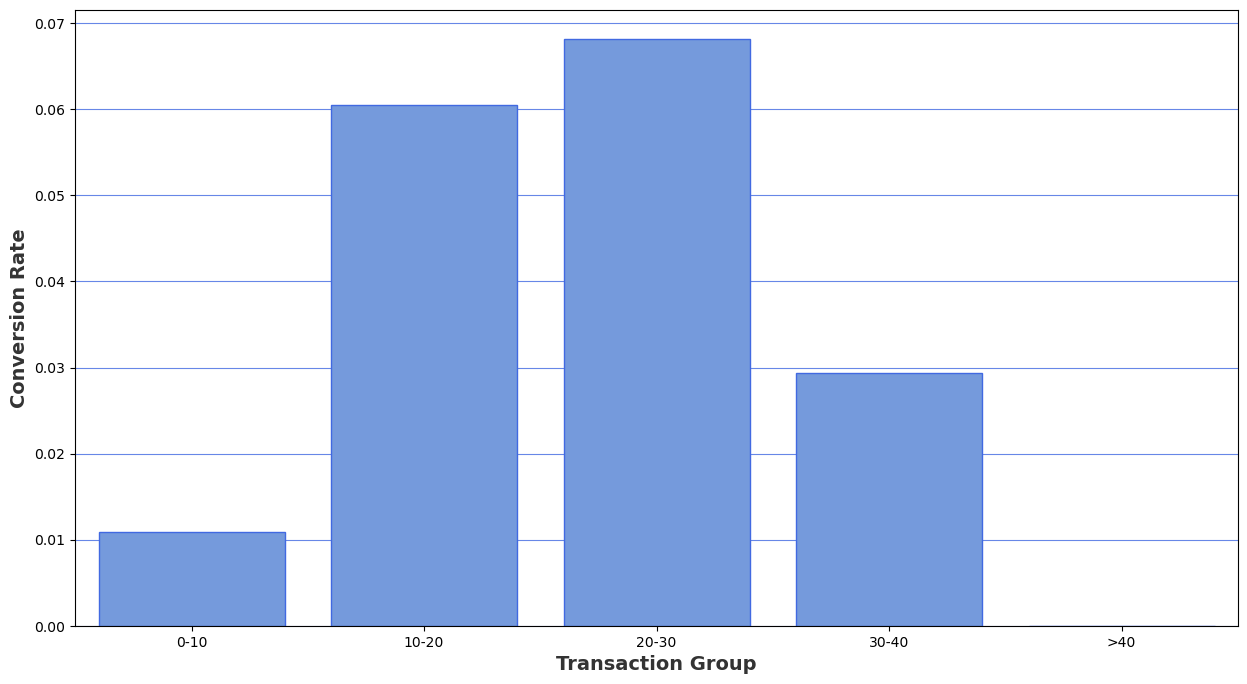

In [537]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
sns.barplot(data=CVR_Transaction, x='Transaction_Group', y='Conversion_Rate', color='cornflowerblue',
            edgecolor='royalblue', ax=ax)
ax.set_xlabel('Transaction Group', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.grid(axis='y', alpha=0.8, color='royalblue')
ax.set_axisbelow(True)

# DATA PREPROCESSING

## Handle Missing Value

In [538]:
df2 = df.copy()

In [539]:
df2.isna().sum().sort_values(ascending = False)

Income_Group           24
Income                 24
Conversion_Rate        11
ID                      0
Response                0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Age                     0
AcceptedCmp3            0
Children                0
Total_Spending          0
Total_Transaction       0
Age_Group               0
Spending_Group          0
AcceptedCmp4            0
NumWebVisitsMonth       0
Year_Birth              0
NumStorePurchases       0
Education               0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
Transaction_Group       0
dtype: int64

In [540]:
missing_value = df2.isna().sum() *100/len(df)
print(round(missing_value, 4).sort_values(ascending=False))

Income_Group           1.0714
Income                 1.0714
Conversion_Rate        0.4911
ID                     0.0000
Response               0.0000
AcceptedCmp5           0.0000
AcceptedCmp1           0.0000
AcceptedCmp2           0.0000
Complain               0.0000
Z_CostContact          0.0000
Z_Revenue              0.0000
Age                    0.0000
AcceptedCmp3           0.0000
Children               0.0000
Total_Spending         0.0000
Total_Transaction      0.0000
Age_Group              0.0000
Spending_Group         0.0000
AcceptedCmp4           0.0000
NumWebVisitsMonth      0.0000
Year_Birth             0.0000
NumStorePurchases      0.0000
Education              0.0000
Marital_Status         0.0000
Kidhome                0.0000
Teenhome               0.0000
Dt_Customer            0.0000
Recency                0.0000
MntCoke                0.0000
MntFruits              0.0000
MntMeatProducts        0.0000
MntFishProducts        0.0000
MntSweetProducts       0.0000
MntGoldPro

In [541]:
df2 = df2.dropna(subset=['Conversion_Rate', 'Income','Income_Group'])

## Handle Duplicate

In [542]:
df2.duplicated().sum()

0

## Remove Unnecessary Colums

In [543]:
print(f'Before Filtered are {df2.shape[1]} columns')
remove_cols = ['ID','Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer',
               'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
               'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 
               'Z_CostContact', 'Z_Revenue']
df2.drop(columns=remove_cols, axis=1, inplace=True)
print(f'After Filtered are {df2.shape[1]} columns')

Before Filtered are 38 columns
After Filtered are 16 columns


## Feature Encoding

In [544]:
cat_cols = df2.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    print(f'Number of Unique Value {col} is {df2[col].nunique()}:')
    print(sorted(df[col].unique().tolist()))
    print('\n')

Number of Unique Value Education is 5:
['D3', 'S1', 'S2', 'S3', 'SMA']


Number of Unique Value Marital_Status is 6:
['Bertunangan', 'Cerai', 'Duda', 'Janda', 'Lajang', 'Menikah']


Number of Unique Value Age_Group is 7:
['20-30', '31-40', '41-50', '51-60', '61-70', '71-80', '>80']


Number of Unique Value Spending_Group is 6:
['0-0.5M', '0.5M-1M', '1.5M-2M', '1M-1.5M', '2M-2.5M', '>2.5M']


Number of Unique Value Transaction_Group is 5:
['0-10', '10-20', '20-30', '30-40', '>40']




In [545]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2206 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Education          2206 non-null   object  
 1   Marital_Status     2206 non-null   object  
 2   Income             2206 non-null   float64 
 3   Recency            2206 non-null   int64   
 4   NumWebVisitsMonth  2206 non-null   int64   
 5   Complain           2206 non-null   int64   
 6   Response           2206 non-null   int64   
 7   Conversion_Rate    2206 non-null   float64 
 8   Age                2206 non-null   int64   
 9   Children           2206 non-null   int64   
 10  Total_Spending     2206 non-null   int64   
 11  Total_Transaction  2206 non-null   int64   
 12  Age_Group          2206 non-null   object  
 13  Income_Group       2206 non-null   category
 14  Spending_Group     2206 non-null   object  
 15  Transaction_Group  2206 non-null   object  
dtypes: cat

In [546]:
en_cols = ['Education', 'Marital_Status', 'Age_Group', 'Spending_Group', 'Transaction_Group']
df[en_cols].head()

,Education,Marital_Status,Age_Group,Spending_Group,Transaction_Group
0,S1,Lajang,61-70,1.5M-2M,20-30
1,S1,Lajang,61-70,0-0.5M,0-10
2,S1,Bertunangan,51-60,0.5M-1M,20-30
3,S1,Bertunangan,31-40,0-0.5M,0-10
4,S3,Menikah,41-50,0-0.5M,10-20


In [547]:
df2['Education'] = df2['Education'].map({'SMA':0, 'D3':1, 'S1':2, 'S2':3, 'S3':4})
df2['Age_Group'] = df2['Age_Group'].map({'20-30':0, '31-40':1, '41-50':2, '51-60':3, '61-70':4, '71-80':5})
df2['Income_Group'] = df2['Income_Group'].map({'0M-10M':0, '10M-20M':1, '20M-30M':2, '30M-40M':3, '40M-50M':4, '50M-60M':5,
              '60M-70M':6, '70M-80M':7, '80M-90M':8, '90M-100M':9, '>100M':10})
df2['Spending_Group'] = df2['Spending_Group'].map({'0-0.5M':0, '0.5M-1M':1, '1M-1.5M':2, '1.5M-2M':3, '2M-2.5M':4, '>2.5M':5})
df2['Transaction_Group'] = df2['Transaction_Group'].map({'0-10':0, '10-20':1, '20-30':2, '30-40':3})

In [548]:
df2.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Conversion_Rate,Age,Children,Total_Spending,Total_Transaction,Age_Group,Income_Group,Spending_Group,Transaction_Group
0,2,Lajang,58138000.0,58,7,0,1,0.14,67,0,1617000,25,4.0,5,3,2.0
1,2,Lajang,46344000.0,38,5,0,0,0.00,70,2,27000,6,4.0,4,0,0.0
2,2,Bertunangan,71613000.0,26,4,0,0,0.00,59,0,776000,21,3.0,7,1,2.0
3,2,Bertunangan,26646000.0,26,6,0,0,0.00,40,1,53000,8,1.0,2,0,0.0
4,4,Menikah,58293000.0,94,5,0,0,0.00,43,1,422000,19,2.0,5,0,1.0


In [549]:
status_encoding = pd.get_dummies(df2['Marital_Status'], prefix='MaritalStatus')
df2 = pd.concat([df2, status_encoding], axis=1)
df2.drop('Marital_Status', axis=1, inplace=True)

In [550]:
df2.head()

,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,Conversion_Rate,Age,Children,Total_Spending,Total_Transaction,Age_Group,Income_Group,Spending_Group,Transaction_Group,MaritalStatus_Bertunangan,MaritalStatus_Cerai,MaritalStatus_Duda,MaritalStatus_Janda,MaritalStatus_Lajang,MaritalStatus_Menikah
0,2,58138000.0,58,7,0,1,0.14,67,0,1617000,25,4.0,5,3,2.0,0,0,0,0,1,0
1,2,46344000.0,38,5,0,0,0.00,70,2,27000,6,4.0,4,0,0.0,0,0,0,0,1,0
2,2,71613000.0,26,4,0,0,0.00,59,0,776000,21,3.0,7,1,2.0,1,0,0,0,0,0
3,2,26646000.0,26,6,0,0,0.00,40,1,53000,8,1.0,2,0,0.0,1,0,0,0,0,0
4,4,58293000.0,94,5,0,0,0.00,43,1,422000,19,2.0,5,0,1.0,0,0,0,0,0,1


## Standardization

In [551]:
stand_cols = ['Income', 'Recency', 'NumWebVisitsMonth','Age', 'Total_Spending', 'Total_Transaction']

In [552]:
for col in stand_cols:
    df2[col] = StandardScaler().fit_transform(df2[col].values.reshape(-1, 1))

In [553]:
df2[stand_cols]

,Income,Recency,NumWebVisitsMonth,Age,Total_Spending,Total_Transaction
0,0.247791,0.312501,0.689304,0.988076,1.679389,1.330024
1,-0.228623,-0.379228,-0.142764,1.238443,-0.960344,-1.161223
2,0.792109,-0.794266,-0.558798,0.320431,0.283153,0.805551
3,-1.024317,-0.794266,0.273270,-1.265228,-0.917179,-0.898986
4,0.254052,1.557614,-0.142764,-1.014861,-0.304561,0.543315
...,...,...,...,...,...,...
2235,0.372409,-0.102536,-0.142764,0.153519,1.221172,0.412196
2236,0.485150,0.243328,0.689304,1.906089,-0.268037,0.936670
2237,0.201055,1.453854,0.273270,-1.014861,1.055151,0.543315
2238,0.696454,-1.416822,-0.974832,1.071532,0.394387,1.067788


## Data Modeling

In [554]:
df3=df2.copy()

In [555]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2206 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Education                  2206 non-null   int64   
 1   Income                     2206 non-null   float64 
 2   Recency                    2206 non-null   float64 
 3   NumWebVisitsMonth          2206 non-null   float64 
 4   Complain                   2206 non-null   int64   
 5   Response                   2206 non-null   int64   
 6   Conversion_Rate            2206 non-null   float64 
 7   Age                        2206 non-null   float64 
 8   Children                   2206 non-null   int64   
 9   Total_Spending             2206 non-null   float64 
 10  Total_Transaction          2206 non-null   float64 
 11  Age_Group                  2195 non-null   float64 
 12  Income_Group               2206 non-null   category
 13  Spending_Group             2206 n

In [556]:
df3 = df3.dropna(subset=['Age_Group', 'Transaction_Group'])

## K-Means

In [565]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 11)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(df3)
    inertias.append(kmeanModel.inertia_)
    mapping2[k] = kmeanModel.inertia_

In [566]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

2 : 21399.72223511802
3 : 18606.148362417916
4 : 17008.79707821795
5 : 15815.107080975038
6 : 15019.410896035553
7 : 14369.504922868873
8 : 13924.170180957419
9 : 13343.041763762154
10 : 12985.352262531756


## Inertia

<Axes: title={'center': 'Inertia Evaluation Score'}>

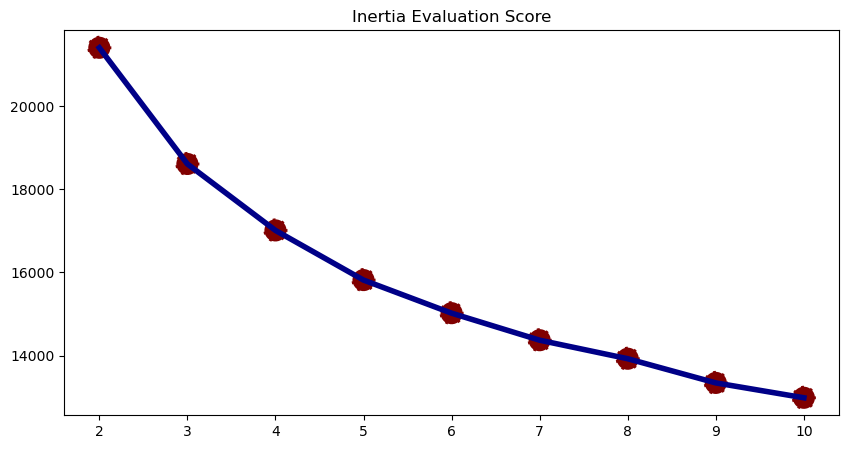

In [568]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df3)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('Inertia Evaluation Score')
sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

## Silhoutte

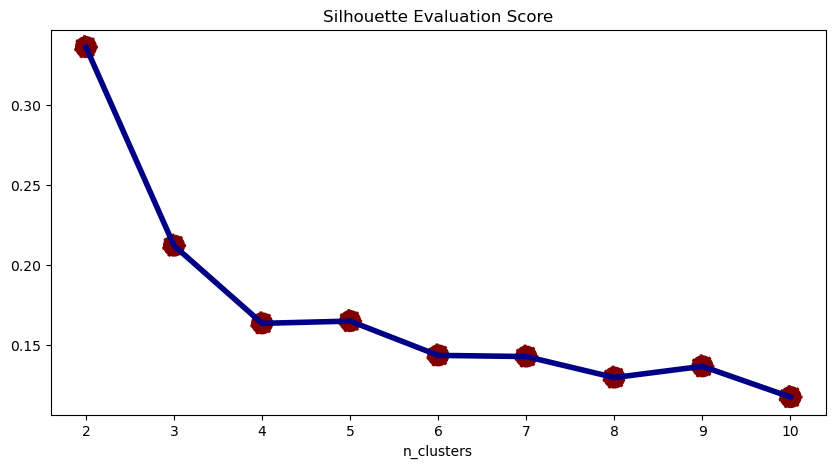

In [569]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df3)
    preds = kmeans.predict(df3)
    score_euclidean = silhouette_score(df3, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Silhouette Evaluation Score')
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.xlabel('n_clusters')
plt.show()

In [570]:
eval_scores = []
for k in K:
    clusterer = KMeans(n_clusters=k, random_state=0)
    preds = clusterer.fit_predict(df3)
    score = silhouette_score(df3, preds)
    eval_scores.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(k, score))

For n_clusters = 2, silhouette score is 0.33591318399601955
For n_clusters = 3, silhouette score is 0.2109485274845423
For n_clusters = 4, silhouette score is 0.1632248821115487
For n_clusters = 5, silhouette score is 0.16462518756470987
For n_clusters = 6, silhouette score is 0.14253567890438149
For n_clusters = 7, silhouette score is 0.14308328219689295
For n_clusters = 8, silhouette score is 0.1302811864420504
For n_clusters = 9, silhouette score is 0.14105490779248905
For n_clusters = 10, silhouette score is 0.12697811537780382


In [577]:
numerical_columns = df3.select_dtypes(include=['number']).columns.tolist()
kmeans_numerical = KMeans(n_clusters=4, random_state=42)
df3['Cluster'] = kmeans_numerical.fit_predict(df[numerical_columns])
df3.head()

KeyError: "['MaritalStatus_Bertunangan', 'MaritalStatus_Cerai', 'MaritalStatus_Duda', 'MaritalStatus_Janda', 'MaritalStatus_Lajang', 'MaritalStatus_Menikah', 'Cluster'] not in index"

# PCA

In [485]:
df4=df3.copy()

In [489]:
df4.head()

,Education,Income,Recency,NumWebVisitsMonth,Complain,Response,Conversion_Rate,Age,Children,Total_Spending,Total_Transaction,Age_Group,Income_Group,Spending_Group,Transaction_Group,MaritalStatus_Bertunangan,MaritalStatus_Cerai,MaritalStatus_Duda,MaritalStatus_Janda,MaritalStatus_Lajang,MaritalStatus_Menikah,Cluster
0,2,0.247791,0.312501,0.689304,0,1,0.14,0.988076,0,1.679389,1.330024,4.0,5,3,2.0,0,0,0,0,1,0,2
1,2,-0.228623,-0.379228,-0.142764,0,0,0.00,1.238443,2,-0.960344,-1.161223,4.0,4,0,0.0,0,0,0,0,1,0,3
2,2,0.792109,-0.794266,-0.558798,0,0,0.00,0.320431,0,0.283153,0.805551,3.0,7,1,2.0,1,0,0,0,0,0,2
3,2,-1.024317,-0.794266,0.273270,0,0,0.00,-1.265228,1,-0.917179,-0.898986,1.0,2,0,0.0,1,0,0,0,0,0,0
4,4,0.254052,1.557614,-0.142764,0,0,0.00,-1.014861,1,-0.304561,0.543315,2.0,5,0,1.0,0,0,0,0,0,1,2


In [487]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2194 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Education                  2194 non-null   int64   
 1   Income                     2194 non-null   float64 
 2   Recency                    2194 non-null   float64 
 3   NumWebVisitsMonth          2194 non-null   float64 
 4   Complain                   2194 non-null   int64   
 5   Response                   2194 non-null   int64   
 6   Conversion_Rate            2194 non-null   float64 
 7   Age                        2194 non-null   float64 
 8   Children                   2194 non-null   int64   
 9   Total_Spending             2194 non-null   float64 
 10  Total_Transaction          2194 non-null   float64 
 11  Age_Group                  2194 non-null   float64 
 12  Income_Group               2194 non-null   category
 13  Spending_Group             2194 n

## Cluster by Age

In [492]:
cluster_age = df4.groupby(['Cluster', 'Age_Group'])['Conversion_Rate'].mean()
cluster_age = cluster_age.unstack(level=0).fillna(0.0)
cluster_age.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_age

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Age_Group,,,,
0.0,0.027500,0.083333,0.000000,0.000000
1.0,0.014304,0.196579,0.030769,0.000000
2.0,0.015256,0.152131,0.011278,0.007500
3.0,0.016132,0.097040,0.017011,0.015938
4.0,0.000000,0.120413,0.023333,0.008167
5.0,0.000000,0.138286,0.019744,0.012286


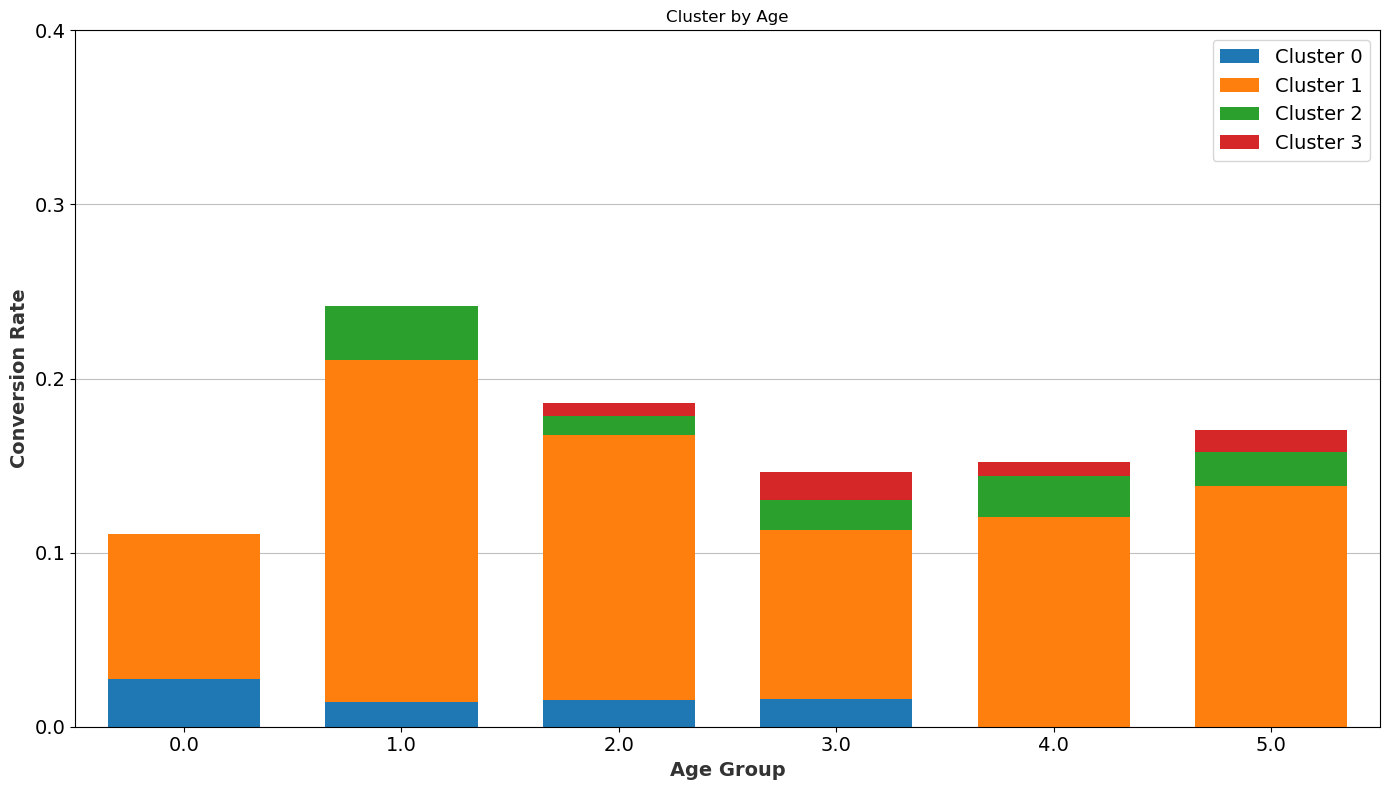

In [497]:
fig, ax = plt.subplots(1, 1, figsize=(14,8))
plt.title('Cluster by Age')
cluster_age.plot(kind='bar', stacked=True, width=0.7, ax=ax)
ax.set_xlabel('Age Group', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)
plt.xlim(-0.5, 5.5) 
plt.ylim(0, 0.4) 
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 0.45, 0.1))
ax.legend(fontsize=14)
plt.tight_layout()
plt.show()

## Cluster by Income

In [500]:
cluster_income = df4.groupby(['Cluster', 'Income_Group'])['Conversion_Rate'].mean()
cluster_income = cluster_income.unstack(level=0).fillna(0.0)
cluster_income.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_income

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Income_Group,,,,
0,0.013600,0.000000,0.000000,0.000000
1,0.015795,0.000000,0.000000,0.000000
2,0.015678,0.000000,0.000000,0.005227
3,0.015027,0.000000,0.000000,0.019716
4,0.012778,0.000000,0.040500,0.012196
5,0.000000,0.000000,0.017758,0.002989
6,0.000000,0.078088,0.016549,0.000000
7,0.000000,0.085633,0.007907,0.000000
8,0.000000,0.194625,0.000000,0.000000


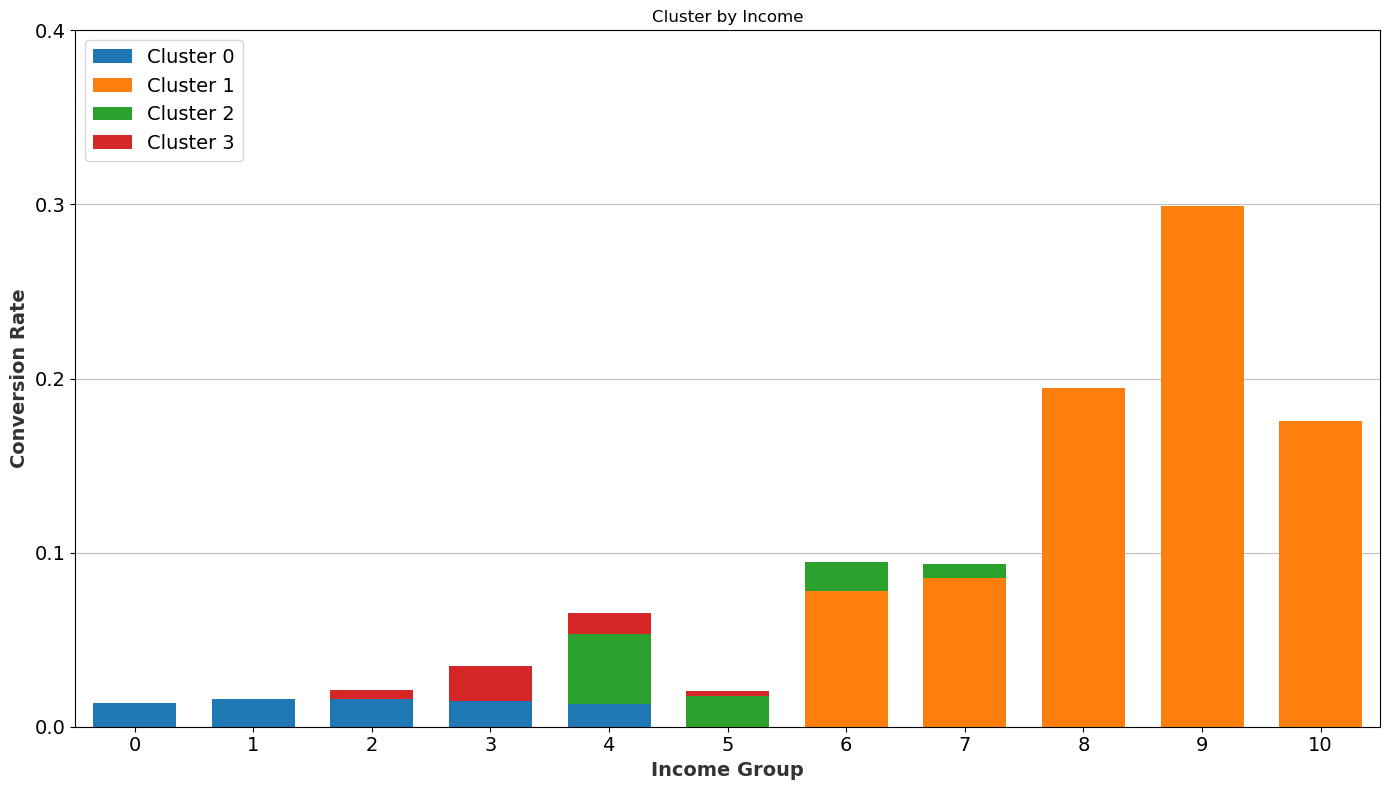

In [501]:
fig, ax = plt.subplots(1, 1, figsize=(14,8))
plt.title('Cluster by Income')
cluster_income.plot(kind='bar', stacked=True, width=0.7, ax=ax)
ax.set_xlabel('Income Group', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)
plt.xlim(-0.5, 10.5)
plt.ylim(0, 0.4) 
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 0.45, 0.1))
ax.legend(fontsize=14, loc='upper left')
plt.tight_layout()
plt.show()

## Cluster by Spending

In [508]:
cluster_by_spending = df4.groupby(['Cluster', 'Spending_Group'])['Conversion_Rate'].mean()
spending_order = ['0-0.5M', '0.5M-1M', '1M-1.5M', '1.5M-2M', '2M-2.5M', '>2.5M']
cluster_by_spending = cluster_by_spending.unstack(level=0).fillna(0.0)
cluster_by_spending.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_by_spending

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Spending_Group,,,,
0,0.014806,0.000000,0.017167,0.012097
1,0.028333,0.068000,0.013443,0.015714
2,0.000000,0.106787,0.026797,0.000000
3,0.000000,0.173389,0.068750,0.000000
4,0.000000,0.215217,0.000000,0.000000
5,0.000000,0.416667,0.000000,0.000000


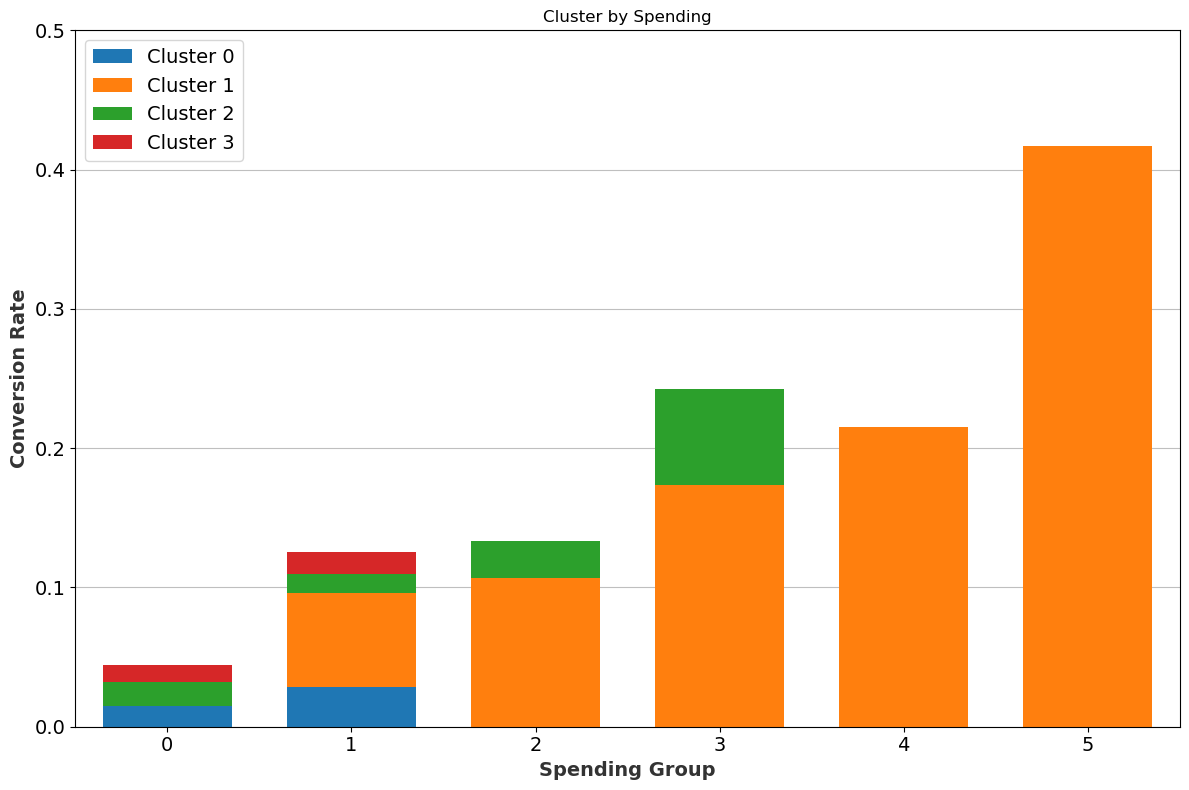

In [509]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
plt.title('Cluster by Spending')
cluster_by_spending.plot(kind='bar', stacked=True, width=0.7, ax=ax)
ax.set_xlabel('Spending Group', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)
plt.xlim(-0.5, 5.5)
plt.ylim(0, 0.5) 
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 0.55, 0.1))
ax.legend(fontsize=14, loc='upper left')
plt.tight_layout()
plt.show()

In [516]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
cluster_summary = df4.groupby('Cluster')[numerical_columns].mean()
cluster_summary.transpose()

KeyError: "Columns not found: 'MntGoldProds', 'AcceptedCmp4', 'Kidhome', 'AcceptedCmp1', 'Year_Birth', 'NumCatalogPurchases', 'Teenhome', 'NumWebPurchases', 'ID', 'Z_CostContact', 'NumDealsPurchases', 'AcceptedCmp3', 'MntFruits', 'AcceptedCmp2', 'MntSweetProducts', 'MntCoke', 'MntFishProducts', 'AcceptedCmp5', 'Z_Revenue', 'NumStorePurchases', 'MntMeatProducts'"

In [510]:
cluster_df = cluster_summary

# Plotting interesting features
plt.figure(figsize=[15, 10])

# Income
plt.subplot(2, 2, 1)
plt.bar(cluster_df['Cluster'].astype(str), cluster_df['Income'], color='skyblue')
plt.title('Income per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.xticks(cluster_df['Cluster'])

plt.subplot(2, 2, 2)
plt.bar(cluster_df['Cluster'].astype(str), cluster_df['NumWebPurchases'], color='orange')
plt.title('Number of Web Purchases per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Web Purchases')
plt.xticks(cluster_df['Cluster'])

plt.subplot(2, 2, 3)
plt.bar(cluster_df['Cluster'].astype(str), cluster_df['Age'], color='green')
plt.title('Age per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.xticks(cluster_df['Cluster'])

NameError: name 'cluster_summary' is not defined